In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transTest = pd.read_csv('test_transaction.csv')
transTrain = pd.read_csv('train_transaction.csv')
idTest = pd.read_csv('test_identity.csv')
idTrain = pd.read_csv('train_identity.csv')

In [3]:
'''
Funkcija za rezime na odreden dataset. 
Funkcijata vraka dataframe vo koj se sodrzat informacii za varijablite na datasetot koj e vnesen kako argument

'''

def resumeTable(df):
    print('Input dataframe shape is {}'.format(df.shape))
    summary = pd.DataFrame(data = df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index': 'Name'})
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = (summary['Missing']/df.shape[0])*100
    summary['Unique'] = df.nunique().values
    summary['Unique Percentage'] = (summary['Unique']/df.shape[0])*100
    return summary
'''
    Funkcija za namaluvaje na iskoristena memorija
'''
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

''' 
    Funckija za naoganje na broj na outliers. Se koristat srednata vrednost na odredena kolona i standardnata devijacija.
'''
def CalcOutliers(col):
    mean = col.mean()
    std = col.std()
    cut = std * 3
    
    lower = mean - cut
    upper = mean + cut
    
    lowerOutliers = [x for x in col if x<lower]
    higherOutliers = [x for x in col if x>upper]
    noOutliers = [x for x in col if x>lower and x<upper]
    
    totalOutliers = [x for x in col if x<lower or x>upper]
    
    print('Identified lowest outliers: %d' % len(lowerOutliers)) 
    print('Identified upper outliers: %d' % len(higherOutliers)) 
    print('Total outlier observations: %d' % len(totalOutliers)) 
    print('Non-outlier observations: %d' % len(noOutliers)) 
    print("Total percentual of Outliers: ", round((len(totalOutliers) / len(noOutliers) )*100, 4))

In [5]:
#train = pd.merge(transTrain, idTrain, on = 'TransactionID', how = 'left')
#test = pd.merge(transTest, idTest, on = 'TransactionID', how = 'left')

In [4]:
transTrain.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
transTrain = reduce_mem_usage(transTrain)
idTrain = reduce_mem_usage(idTrain)

Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 25.86 Mb (42.7% reduction)


In [5]:
print(resumeTable(transTrain))
print("transTrain has {} rows and {} columns".format(transTrain.shape[0], transTrain.shape[1]))

Input dataframe shape is (590540, 394)
               Name   dtypes  Missing  Missing Percentage  Unique  \
0     TransactionID    int64        0            0.000000  590540   
1           isFraud    int64        0            0.000000       2   
2     TransactionDT    int64        0            0.000000  573349   
3    TransactionAmt  float64        0            0.000000   20902   
4         ProductCD   object        0            0.000000       5   
5             card1    int64        0            0.000000   13553   
6             card2  float64     8933            1.512683     500   
7             card3  float64     1565            0.265012     114   
8             card4   object     1577            0.267044       4   
9             card5  float64     4259            0.721204     119   
10            card6   object     1571            0.266028       4   
11            addr1  float64    65706           11.126427     332   
12            addr2  float64    65706           11.126427      7

In [71]:
transTrain['isFraud'] = transTrain['isFraud'].astype('object')

In [81]:
'''
    Funckija za podelba na varijablite od odreden dataset na numericki i kategoricki,
    odnosno stavanje na nivnite iminja vo odredena lista koja sto ke se iskoristi ponatamu(se misli na listata)
'''
cat, num = [], []
def dtypeSeparation(df):
    for col in df:
        if df[col].dtype == 'O':
            cat.append(col)
        numerics = ['float16', 'float32', 'int32', 'int16', 'int8', 'float64']
        for element in numerics:
            if df[col].dtype == element:
                num.append(col)        

In [82]:
dtypeSeparation(transTrain)

In [85]:
'''
    Kreiranje na dataframe koj sto se sodrzi samo so kategorickite varijabli
'''
transTrainCategorical = pd.DataFrame(transTrain[cat], columns=cat)

In [99]:
transTrainCategorical.head(50)

,isFraud,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,0,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,0,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,0,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,0,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,W,visa,debit,gmail.com,NaN,T,T,T,M1,F,T,NaN,NaN,NaN
6,0,W,visa,debit,yahoo.com,NaN,T,T,T,M0,F,F,T,T,T
7,0,W,visa,debit,mail.com,NaN,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
8,0,H,visa,debit,anonymous.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,W,mastercard,debit,yahoo.com,NaN,T,T,T,M0,T,T,NaN,NaN,NaN


In [100]:
'''
    Rezime na dataframe transTrainCategorical
'''
resumeTable(transTrainCategorical)

Input dataframe shape is (590540, 15)


,Name,dtypes,Missing,Missing Percentage,Unique,Unique Percentage
0,isFraud,object,0,0.000000,2,0.000339
1,ProductCD,object,0,0.000000,5,0.000847
2,card4,object,1577,0.267044,4,0.000677
3,card6,object,1571,0.266028,4,0.000677
4,P_emaildomain,object,94456,15.994852,59,0.009991
5,R_emaildomain,object,453249,76.751617,60,0.010160
6,M1,object,271100,45.907136,2,0.000339
7,M2,object,271100,45.907136,2,0.000339
8,M3,object,271100,45.907136,2,0.000339
9,M4,object,281444,47.658753,3,0.000508


In [148]:
'''
    Napraven drop poradi toa sto distribucijata e losa i procentot na missing values e golem. >75%
'''
transTrain.drop(columns= 'P_emaildomain', axis = 1, inplace = True)

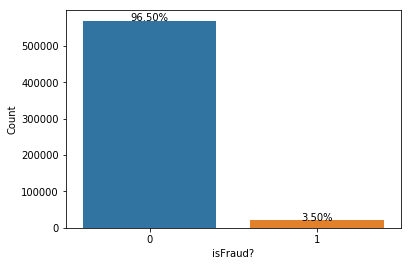

In [90]:
'''
    Distribucija na target varijabla.
'''
transTrain['TransactionAmt'] = transTrain['TransactionAmt'].astype(float)
total = float(len(transTrain))
ax = sns.countplot(x= 'isFraud', data=transTrain)
ax.set_xlabel('isFraud?')
ax.set_ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 

In [13]:
'''
    Presmetka na kvantilite na TransactionAmt varijablata od trening mnozestvoto
'''
print('TransactionAmt quantiles:')
print(transTrain['TransactionAmt'].quantile([0,0.25, 0.5, 0.75, 1]))

TransactionAmt quantiles:
0.00        0.250977
0.25       43.312500
0.50       68.750000
0.75      125.000000
1.00    31936.000000
Name: TransactionAmt, dtype: float64


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


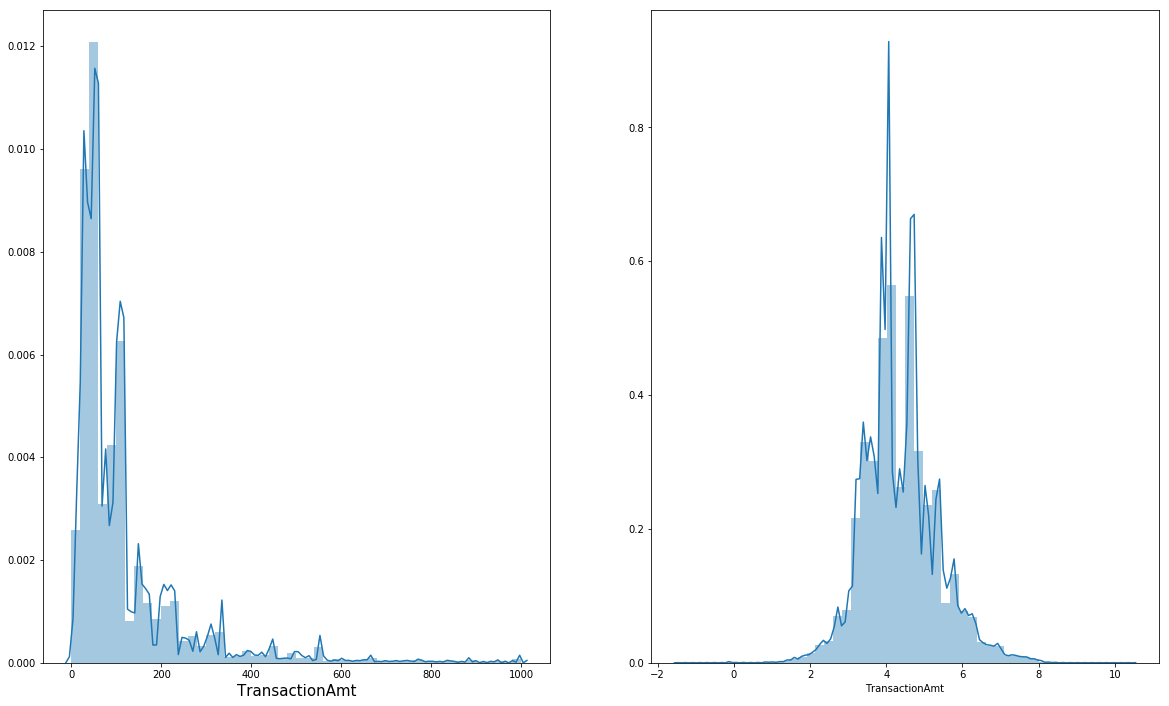

In [14]:
'''
    Distribucija na TransactionAmt varijablata. Prikazanata distribucija i na logaritmirani vrednosti
'''
plt.figure(figsize = (20,12))
plt.subplot(121)
g = sns.distplot(transTrain[transTrain['TransactionAmt'] <= 1000]['TransactionAmt'])
g.set_xlabel('TransactionAmt', fontsize = 15)

plt.subplot(122)
g1 = sns.distplot(np.log(transTrain['TransactionAmt']))

In [15]:
'''
    Povikana funckcija za naoganje outliers
'''
CalcOutliers(transTrain.TransactionAmt)

Identified lowest outliers: 0
Identified upper outliers: 10097
Total outlier observations: 10097
Non-outlier observations: 580443
Total percentual of Outliers:  1.7395


In [ ]:
tmp = pd.crosstab(transTrain['ProductCD'], transTrain['isFraud'], normalize = 'index')*100
tmp = tmp.reset_index()
tmp.rename(columns = {0:'No Fraud', 1: 'Fraud'}, inplace=True)

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(211)
g = sns.countplot(x = 'ProductCD', data = transTrain)
g.set_xlabel('ProductCD', fontsize = 15)
g.set_ylabel('ProductCD Counts', fontsize=15)
g.set_title('ProductCD value distribution', fontsize = 15)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14)
    
plt.subplot(212)
g1 = sns.countplot(x = 'ProductCD', hue='isFraud', data = transTrain)
g1.set_xlabel('isFraud by ProductCD', fontsize = 15)
g1.set_ylabel('isFraud by ProductCD Counts', fontsize=15)
g1.set_title('isFraud by ProductCD value distribution', fontsize = 15)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x = 'ProductCD', y = 'Fraud', data = tmp, order=['W', 'H', 'C', 'S', 'R'], color= 'red')

In [ ]:
resumeTable(transTrain[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']])

In [ ]:
tmp1 = pd.crosstab(transTrain.card4, transTrain.isFraud, normalize='index')*100
tmp1 = tmp1.reset_index()
tmp1.rename(columns= {0:'No Fraud', 1: 'Fraud'}, inplace = True)
tmp1

In [ ]:
plt.figure(figsize = (14,8))
plt.subplot(121)
g = sns.countplot(x = 'card4', data = transTrain)
g.set_xlabel('Card 4', fontsize = 14)
g.set_ylabel('Card 4 count', fontsize = 14)
g.set_title('Card 4 count distribution', fontsize = 14)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14)
    
plt.subplot(122)
g1 = sns.countplot(x = 'card4', hue='isFraud', data = transTrain)
g1.set_xlabel('Card 4', fontsize = 14)
g1.set_ylabel('Card 4 count', fontsize = 14)
g1.set_title('Card 4 count distribution', fontsize = 14)
gt = g1.twinx()
gt = sns.pointplot(x = 'card4', y = 'Fraud' , data = tmp1, order=['discover', 'mastercard', 'visa', 'american express'], color = 'black')

In [ ]:
transTrain.card6.value_counts()

In [ ]:
tmp2 = pd.crosstab(transTrain.card6, transTrain.isFraud, normalize = 'index') * 100
tmp2 = tmp2.reset_index()
tmp2.rename(columns={0: 'No Fraud', 1: 'Fraud'}, inplace=True)

In [ ]:
tmp2

In [ ]:
plt.figure(figsize = (14,8))
g = sns.countplot(x = 'card6', data = transTrain)
g.set_title('Card 6 Countplot', fontsize = 14)
g.set_xlabel('Card 6 Values', fontsize = 14)
g.set_ylabel('Card 6 Count', fontsize = 14)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14)

In [ ]:
sns.boxplot(x = transTrain['card6'], y = np.log(transTrain[transTrain['TransactionAmt']<=450]['TransactionAmt']))

In [ ]:
sns.boxplot(x = transTrain['card6'], y = np.log(transTrain[transTrain['isFraud']==1]['TransactionAmt']))

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(x = transTrain['isFraud'], y = np.log(transTrain['TransactionAmt']),hue = transTrain['card6'])


In [ ]:
sns.boxplot(x = transTrain['card6'], y = np.log(transTrain['TransactionAmt']))

In [ ]:
transTrain.groupby(['card6','isFraud','TransactionAmt']).size()